In [ ]:
!pip install --quiet yfinance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as pdr
import datetime as dt
from scipy import stats
import yfinance as yf
import time

sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
tickers = ['AAPL','MSFT','GOOGL','AMZN']
weights = np.array([0.25,0.25,0.25,0.25])

start = dt.datetime(2020,1,1)
end = dt.datetime.today()

price = pd.DataFrame(index=pd.date_range(start,end))
print(price)

Empty DataFrame
Columns: []
Index: [2020-01-01 00:00:00, 2020-01-02 00:00:00, 2020-01-03 00:00:00, 2020-01-04 00:00:00, 2020-01-05 00:00:00, 2020-01-06 00:00:00, 2020-01-07 00:00:00, 2020-01-08 00:00:00, 2020-01-09 00:00:00, 2020-01-10 00:00:00, 2020-01-11 00:00:00, 2020-01-12 00:00:00, 2020-01-13 00:00:00, 2020-01-14 00:00:00, 2020-01-15 00:00:00, 2020-01-16 00:00:00, 2020-01-17 00:00:00, 2020-01-18 00:00:00, 2020-01-19 00:00:00, 2020-01-20 00:00:00, 2020-01-21 00:00:00, 2020-01-22 00:00:00, 2020-01-23 00:00:00, 2020-01-24 00:00:00, 2020-01-25 00:00:00, 2020-01-26 00:00:00, 2020-01-27 00:00:00, 2020-01-28 00:00:00, 2020-01-29 00:00:00, 2020-01-30 00:00:00, 2020-01-31 00:00:00, 2020-02-01 00:00:00, 2020-02-02 00:00:00, 2020-02-03 00:00:00, 2020-02-04 00:00:00, 2020-02-05 00:00:00, 2020-02-06 00:00:00, 2020-02-07 00:00:00, 2020-02-08 00:00:00, 2020-02-09 00:00:00, 2020-02-10 00:00:00, 2020-02-11 00:00:00, 2020-02-12 00:00:00, 2020-02-13 00:00:00, 2020-02-14 00:00:00, 2020-02-15 00:00:00

In [ ]:
for ticker in tickers:
    print(f"Fetching {ticker} ",end = '')
    try:
        print('If y finance is not avlaible then stook\n')
        df2 = pdr.DataReader(ticker, 'stooq',start,end)
        df2 = df2.sort_index()
        series = df2['Close']

        print('Y finance\n',end = '')
    except Exception as e:
        # print('If y finance is not avlaible then stook')
        # df2 = pdr.DataReader(ticker, 'stooq',start,end)
        # df2 = df2.sort_index()
        # series = df2['Close']
        df = yf.Ticker(ticker).history(
            start = start.strftime('%Y-%m-%d'),
            end = end.strftime('%Y-%m-%d'),
            auto_adjust=True
            )
        series = df['Close']
        print('Stooq')
    price[ticker] = series
    time.sleep(1)

# ffill fills the data of upper column
price = price.dropna(how='all').ffill().bfill()
price.tail()

Fetching AAPL If y finance is not avlaible then stook

Y finance
Fetching MSFT If y finance is not avlaible then stook

Y finance
Fetching GOOGL If y finance is not avlaible then stook

Y finance
Fetching AMZN If y finance is not avlaible then stook

Y finance


,AAPL,MSFT,GOOGL,AMZN
2025-05-16,211.26,454.27,166.19,205.59
2025-05-19,208.78,458.87,166.54,206.16
2025-05-20,206.86,458.17,163.98,204.07
2025-05-21,202.09,452.57,168.56,201.12
2025-05-22,201.36,454.86,170.87,203.05


In [ ]:
logR = np.log(price / price.shift(1)).dropna()
logR.head()

,AAPL,MSFT,GOOGL,AMZN
2020-01-03,-0.009737,-0.012360,-0.005243,-0.012213
2020-01-06,0.007879,0.002580,0.026304,0.014776
2020-01-07,-0.004666,-0.009299,-0.001935,0.002089
2020-01-08,0.015943,0.016008,0.007094,-0.007839
2020-01-09,0.021054,0.012240,0.010441,0.004788


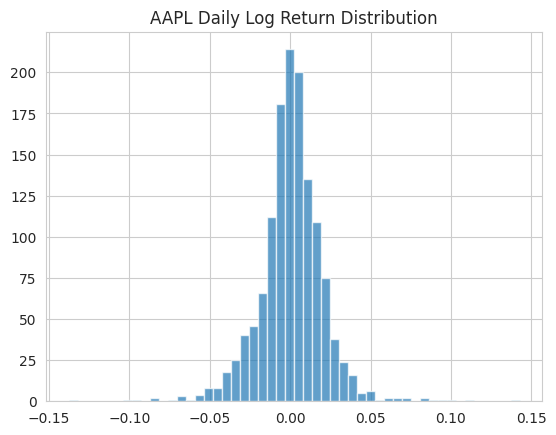

In [ ]:
logR['AAPL'].hist(bins=50, alpha=0.7)
plt.title('AAPL Daily Log Return Distribution')
plt.show()

In [ ]:
summary = pd.DataFrame({
    'Mean': logR.mean(),
    'Variance': logR.var(),
    'Skew': logR.skew(),
    'Kurtosis': logR.kurtosis()
})
summary

,Mean,Variance,Skew,Kurtosis
AAPL,0.000752,0.000425,0.020390,6.226807
MSFT,0.000802,0.000372,-0.164616,7.430717
GOOGL,0.000678,0.000431,-0.227661,3.636135
AMZN,0.000562,0.000524,-0.069482,4.160533


In [ ]:
# Calculate Mu and std
mu_norm, sigma_norm = logR.stack().mean(), logR.stack().std(ddof=1)

# 95% CI for mean under normal
N = logR.size
z95 = stats.norm.ppf(0.975)
ci_mu_norm = (mu_norm - z95 * sigma_norm / np.sqrt(N),
              mu_norm + z95 * sigma_norm / np.sqrt(N))

# 95% CI for sigma via chi-swuare
df = N - 1
chi2_low, chi2_high = stats.chi2.ppf([0.025, 0.975], df)
ci_sigma_norm = (sigma_norm * np.sqrt(N / chi2_low),
                 sigma_norm * np.sqrt(N / chi2_high))

print("Normal fit:")
print(f"Mu: {mu_norm:.5f},95% CI: {ci_mu_norm}")
print(f"Sigma: {sigma_norm:.5f},95% CI: {ci_sigma_norm}")

Normal fit:
Mu: 0.00070,95% CI: (np.float64(0.00014131086898966307), np.float64(0.0012557940331756287))
Sigma: 0.02092,95% CI: (np.float64(0.02132715969121991), np.float64(0.020538695683879997))


In [ ]:
# Fit t distribution to the pooled returns
returns_flat = logR.stack().values
df_t, mu_t, sigma_t = stats.t.fit(returns_flat)

In [ ]:
df_t

np.float64(3.6546557703057285)

In [ ]:
# 95% CI for mu and sigma
B = 1000
estimate = np.array([stats.t.fit(np.random.choice(returns_flat, size=N, replace=True))
            for _ in range(B)])
ci_mu_t = np.percentile(estimate[:, 1], [2.5, 97.5])
ci_sigma_t = np.percentile(estimate[:, 2], [2.5, 97.5])

In [ ]:
print("\nStudent's t fit:")
print(f"df: {df_t:.1f}, mu: {mu_t:.5f}, sigma: {sigma_t:.5f}")
print(f"95% CI for mu (bootstrap): {ci_mu_t}")
print(f"95% CI for sigma (bootstrap): {ci_sigma_t}")


Student's t fit:
df: 3.7, mu: 0.00105, sigma: 0.01447
95% CI for mu (bootstrap): [0.00057056 0.00149837]
95% CI for sigma (bootstrap): [0.01399496 0.01498446]


In [ ]:
portR = logR.dot(weights)

In [ ]:
portR

,0
2020-01-03,-0.009888
2020-01-06,0.012885
2020-01-07,-0.003453
2020-01-08,0.007801
2020-01-09,0.012131
...,...
2025-05-16,0.004292
2025-05-19,0.000785
2025-05-20,-0.009112
2025-05-21,-0.005660


In [ ]:
mu_p = portR.mean()
sigma_p = portR.std(ddof=1)

In [ ]:
# Z score (0.05)
z05 = stats.norm.ppf(0.05)

In [ ]:
# VaR at 95%
VAR_norm = -(mu_p + z05 * sigma_p)
VAR_norm

np.float64(0.029177021598138536)

In [ ]:
# Using student t distribution
t05 = stats.t.ppf(0.05, df_t)

In [ ]:
VaR_t = -(mu_t + sigma_t * t05) * 1
VaR_t

np.float64(0.030653726020313566)

In [ ]:
# Historical Method
# Historical VaR
hist_var = -np.percentile(portR,5)

In [ ]:
print("1-Day 95% VaR")
print(f"Parametric Normal: {VAR_norm:.5f}")
print(f"Parametric Student's t: {VaR_t:.5f}")
print(f"Historical (5th percentile): {hist_var:.5f}")

1-Day 95% VaR
Parametric Normal: 0.02918
Parametric Student's t: 0.03065
Historical (5th percentile): 0.02893


We found that on most days portfolio won't losw morre than 2.9% to 3.1%

Hypothesis Test

In [ ]:
t_stat , p_val = stats.ttest_1samp(portR, 0.0)

In [ ]:
print("One sample t test on portfolio daily returns:")
print(f"t-statistics: {t_stat:.3f}, p-value: {p_val:.3f}")

One sample t test on portfolio daily returns:
t-statistics: 1.415, p-value: 0.157


In [ ]:
if p_val < 0.05:
  print("Reject H0: mean return is significantly different from zero")
else:
  print("Fail to reject H0: no evidence mean retun not = 0")

Fail to reject H0: no evidence mean retun not = 0


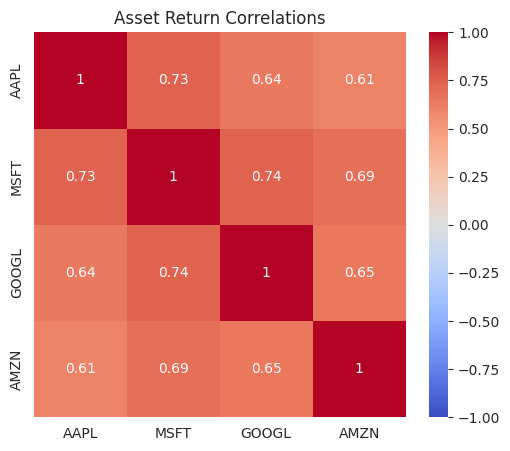

Weighted avg sigma: 0.0209
Actual Portfolio: 0.0182
Diversification benefit: 0.0027


In [ ]:
import seaborn as sns

# a) correlation heatmap
corr = logR.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Asset Return Correlations')
plt.show()

# b) Diversificatio
sigma_i = logR.std()
sigma_weighted = np.dot(weights, sigma_i)
sigma_portfolio = sigma_p
print(f"Weighted avg sigma: {sigma_weighted:.4f}")
print(f"Actual Portfolio: {sigma_portfolio:.4f}")
print(f"Diversification benefit: {sigma_weighted-sigma_portfolio:.4f}")

In [ ]:
# MDD/DD
cum_ret = (price / price.iloc[0]).prod(axis=1)

In [ ]:
cum_port = (portR + 1).cumprod()

In [ ]:
cum_port

,0
2020-01-03,0.990112
2020-01-06,1.002869
2020-01-07,0.999406
2020-01-08,1.007203
2020-01-09,1.019421
...,...
2025-05-16,2.074619
2025-05-19,2.076247
2025-05-20,2.057330
2025-05-21,2.045685


In [ ]:
rolling_max = cum_port.cummax()

In [ ]:
rolling_max
drawdown = (cum_port - rolling_max)/rolling_max

In [ ]:
max_dd = drawdown.min()
end_date = drawdown.idxmin()
start_date = cum_port[:end_date].idxmax()

In [ ]:
print(f"Max Drawdown: {max_dd:.2f}")
print(f"From {start_date.date()} to {end_date.date()}")

Max Drawdown: -0.44
From 2021-12-10 to 2023-01-05


<function matplotlib.pyplot.show(close=None, block=None)>

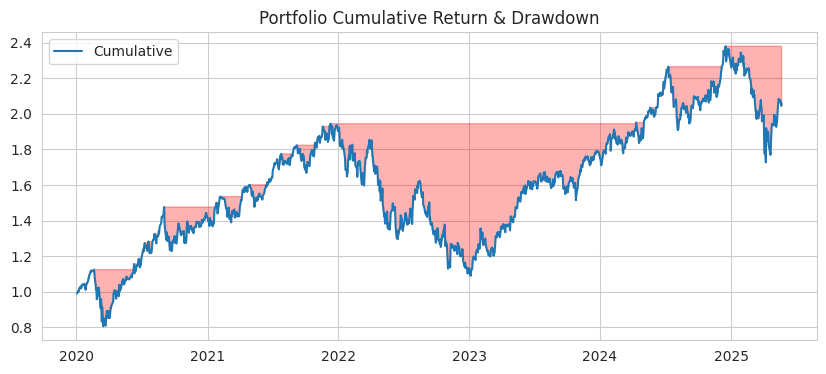

In [ ]:
# Plot
plt.figure(figsize=(10, 4))
plt.plot(cum_port, label='Cumulative')
plt.fill_between(drawdown.index, cum_port, rolling_max,
                 where=drawdown<0, color='red', alpha=0.3)
plt.title('Portfolio Cumulative Return & Drawdown')
plt.legend()
plt.show

In [ ]:
# Expected shortfall / CVAR
alpha = 0.5

# historical
ES_historical = portR[portR <= np.percentile(portR, 5)].mean()

# normal method
ES_norm = (mu_p - sigma_p * stats.norm.pdf(z05) / alpha)

print(f"Historical ES (95%): {ES_historical:.5f}")
print(f"Parametric Normal ES: {ES_norm:.5f}")

Historical ES (95%): -0.04230
Parametric Normal ES: -0.00305


In [ ]:
# Var Backtesting
var_series = (portR.rolling(1).mean() + portR.rolling(1).std()*z05)

exc = portR <- VAR_norm
num_exc = exc.sum()

total = len(portR)

print(f"Execeptions: {num_exc}/{total} days ({num_exc/total:.2%},expected ~5%)")

Execeptions: 67/1354 days (4.95%,expected ~5%)


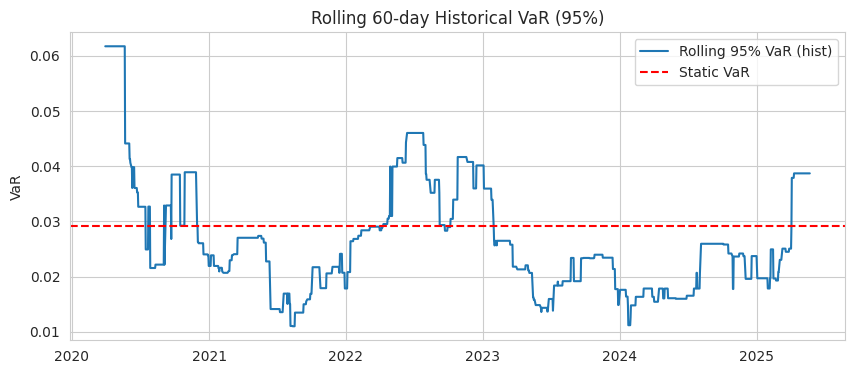

In [ ]:
# Rolling 60-day VaR
window = 60
roll_var = portR.rolling(window).quantile(0.05).dropna()
plt.figure(figsize=(10,4))
plt.plot(-roll_var, label='Rolling 95% VaR (hist)')
plt.axhline(VAR_norm, color='red', linestyle='--', label='Static VaR')
plt.title('Rolling 60-day Historical VaR (95%)')
plt.ylabel('VaR')
plt.legend()
plt.show()

Janque Bara Test

In [ ]:
jb_stat, jb_p = stats.jarque_bera(portR)
print(f"JB ststistics: {jb_stat:.2f}, p-value: {jb_p:.3f}")
if jb_p < 0.05:
  print("Reject normality at 5% level")
else:
  print("Cannot reject normality")

JB ststistics: 1191.66, p-value: 0.000
Reject normality at 5% level
